#**Automated Essay Scoring**

The goal of this project is to combine quantitative features with essay content to improve the reliability of the automated essay scoring. 


In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split as splt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Natural Language Processing /Projects/AES/Train.tsv', sep = '\t', encoding='ISO-8859-1')
data.head(20)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,"Dear @LOCATION1, I think that computers have a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1,Did you know that more and more people these d...,5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1,@PERCENT1 of people agree that computers make ...,5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4,5,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1,In the @LOCATION1 we have the technology of a ...,5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [4]:
# We drop the null columns
data.dropna(axis = 1, inplace = True)

In [5]:
# Not all the scores are marked out of same, so we need to normalize the scores
for i in range(1,9):
    print('Max for set ',i,'is',max(data[data['essay_set']==i]['domain1_score']))
    print('Min for set ',i,'is',min(data[data['essay_set']==i]['domain1_score']))

Max for set  1 is 12
Min for set  1 is 2
Max for set  2 is 6
Min for set  2 is 1
Max for set  3 is 3
Min for set  3 is 0
Max for set  4 is 3
Min for set  4 is 0
Max for set  5 is 4
Min for set  5 is 0
Max for set  6 is 4
Min for set  6 is 0
Max for set  7 is 24
Min for set  7 is 2
Max for set  8 is 60
Min for set  8 is 10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


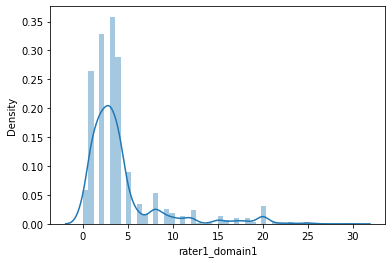

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


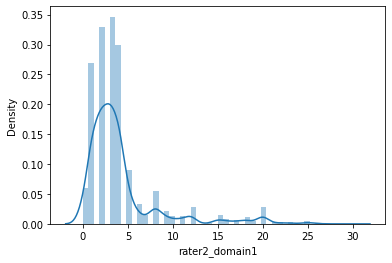

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


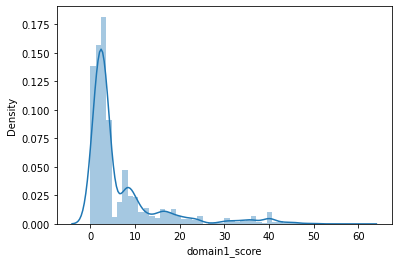

In [6]:
# Visualizing the scores before normalizing
sns.distplot(data['rater1_domain1'])
plt.show()
sns.distplot(data['rater2_domain1'])
plt.show()
sns.distplot(data['domain1_score'])
plt.show()

In [7]:
# We define the normalize function
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]
def normalize(x,min,max):
    x = (x-min)/(max-min)
    return round(x*10)

In [8]:
data['rater01']=data.apply(lambda x:normalize(x['rater1_domain1'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)
data['rater02']=data.apply(lambda x:normalize(x['rater2_domain1'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)
data['final_score']=data.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


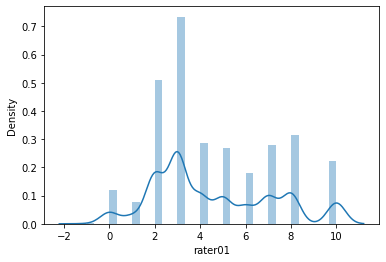

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


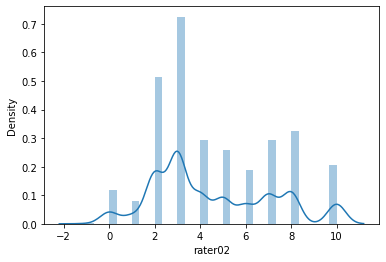

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


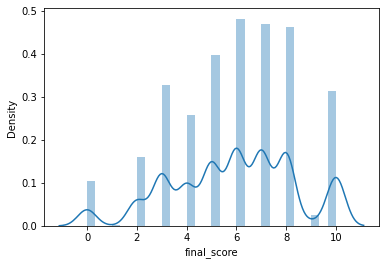

In [9]:
# Visualizing the scores after normalizing
sns.distplot(data['rater01'])
plt.show()
sns.distplot(data['rater02'])
plt.show()
sns.distplot(data['final_score'])
plt.show()

#**Data Preprocessing**

In [10]:
# Removing the stop words
stop_words = set(stopwords.words('english')) 
def rmv_stopwords(essay):
    word_tokens = word_tokenize(essay) 
    clean_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            clean_sentence.append(w)
    return ' '.join(clean_sentence)

data['essay'] = data['essay'].apply(lambda l:rmv_stopwords(l))

In [11]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

data['essay'] = data['essay'].apply(lambda l:clean_essay(l))

In [12]:
# Removing punctuations
def remove_puncs(essay):
    x=[]
    for words in essay.split():
        x.append(words.lower().strip("/*-+'?\:;,\""))
    return ' '.join(x)

data['essay'] = data['essay'].apply(lambda l:remove_puncs(l))

In [20]:
data

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,rater01,rater02,final_score
0,1,1,dear local newspaper i think effects computer...,4,4,8,2,2,6
1,2,1,dear caps1 caps2 i believe using computers be...,5,4,9,3,2,7
2,3,1,dear caps1 caps2 caps3 more people use comput...,4,3,7,2,1,5
3,4,1,dear local newspaper caps1 i found many exper...,5,5,10,3,3,8
4,5,1,dear location1 i know computers positive effe...,4,4,8,2,2,6
...,...,...,...,...,...,...,...,...,...
12971,21626,8,in stories mothers daughters either enemies fr...,17,18,35,3,3,6
12972,21628,8,i never understood meaning laughter shortest d...,15,17,32,2,3,5
12973,21629,8,when laugh caps5 habit caps1 cause what cau...,20,26,40,3,4,7
12974,21630,8,trippin fences i num1 years young short num1...,20,20,40,3,3,7


#**Feature Extraction**

In [21]:
# Calculating the Lexical Diversity of the essays
def lex_div(essay):
    x=[]
    for words in essay.split():
        x.append(words)
    return float(len(x))/len(set(x))
data['Lexical_Diversity'] = data['essay'].apply(lambda l:lex_div(l))

In [34]:
# Defining the syllables function
# The goal of this function is to find the syllable of a word
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count

In [32]:
# Calculating the Text Complexity of the essays
def complexity(essay):
    count = 0
    wcnt = len(essay.split())
    for words in essay.split():
            if (words.strip(".:;?!")==''):
                continue
            if (syllables(words)>2):
                count += 1
    return count/wcnt
data['Word_Complexity'] = data['essay'].apply(lambda l:complexity(l))

In [51]:
# Calculate the Syntactic complexity of the essays
# Sentences that contain a higher number of verbs, nouns, adjectives, conjunctions are more difficult to process and comprehend
def synt_comp(essays):
    tokens = nltk.word_tokenize(essays.lower())
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts
data['No_of_Verbs'] = data['essay'].apply(lambda l:synt_comp(l)['VB'])
data['No_of_Nouns'] = data['essay'].apply(lambda l:synt_comp(l)['NN']+synt_comp(l)['NNS'])
data['No_of_Adj'] = data['essay'].apply(lambda l:synt_comp(l)['JJ'])
data['No_of_Conj'] = data['essay'].apply(lambda l:synt_comp(l)['CC'])

In [49]:
essays = data.essay.iloc[1]
tokens = nltk.word_tokenize(essays.lower())
text = nltk.Text(tokens)
tags = nltk.pos_tag(text)
counts = Counter(tag for word,tag in tags)
print(counts)

Counter({'NN': 65, 'NNS': 38, 'JJ': 28, 'VBP': 19, '.': 19, 'VBG': 16, 'VB': 15, 'RB': 14, 'IN': 9, 'PRP': 8, 'VBD': 6, 'CD': 5, 'MD': 5, 'VBZ': 4, 'DT': 3, 'VBN': 3, 'RBR': 1, 'WRB': 1, 'JJS': 1})


In [53]:
data

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,rater01,rater02,final_score,Lexical_Diversity,Word_Complexity,No_of_Verbs,No_of_Nouns,No_of_Adj,No_of_Conj
0,1,1,dear local newspaper i think effects computer...,4,4,8,2,2,6,1.564516,0.149485,8,74,33,0
1,2,1,dear caps1 caps2 i believe using computers be...,5,4,9,3,2,7,1.793103,0.203846,15,103,28,0
2,3,1,dear caps1 caps2 caps3 more people use comput...,4,3,7,2,1,5,1.513761,0.218182,3,76,21,0
3,4,1,dear local newspaper caps1 i found many exper...,5,5,10,3,3,8,1.676329,0.233429,14,152,50,0
4,5,1,dear location1 i know computers positive effe...,4,4,8,2,2,6,1.906040,0.218310,22,106,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,in stories mothers daughters either enemies fr...,17,18,35,3,3,6,1.875000,0.092157,20,177,77,4
12972,21628,8,i never understood meaning laughter shortest d...,15,17,32,2,3,5,2.024390,0.060241,15,121,36,2
12973,21629,8,when laugh caps5 habit caps1 cause what cau...,20,26,40,3,4,7,1.668919,0.147773,14,172,70,0
12974,21630,8,trippin fences i num1 years young short num1...,20,20,40,3,3,7,1.950820,0.117647,9,106,52,2


# **Applying the ML Models**

In [57]:
X = data.drop(labels=['essay','rater1_domain1','rater2_domain1','domain1_score', 'rater01','rater02'],axis=1)
y = data['final_score']
xtr,xva,ytr,yva = splt(X,y,random_state=32,test_size=0.2)

In [63]:
# We first try a simple linear model
linear_regressor = LinearRegression()
model1 = linear_regressor.fit(xtr, ytr)
y_pred = model1.predict(xva)
print("Mean squared error:", mean_squared_error(yva, y_pred))

Mean squared error: 1.660185599060173e-28


In [64]:
# We first try a simple linear model
clf = SVR(C=1.0, epsilon=0.2)
model2 = clf.fit(xtr, ytr)
y_pred = model2.predict(xva)
print("Mean squared error:", mean_squared_error(yva, y_pred))

Mean squared error: 6.209031828177474


In [65]:
# We first try a simple linear model
clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model3 = clf.fit(xtr, ytr)
y_pred = model3.predict(xva)
print("Mean squared error:", mean_squared_error(yva, y_pred))

Mean squared error: 3.4668721109399135e-09


Comparing 20 cases from the essay sets for all the models on a separate test dataset

In [104]:
sizes = 20
df = pd.DataFrame()
df['Essay_ID'] = np.random.randint(low=1,high=12976, size=sizes)
df['Hand_Graded'] = np.zeros(sizes)
df['RandomForestRegressor'] = np.zeros(sizes)
df['SVR'] = np.zeros(sizes)
df['LinearRegression'] = np.zeros(sizes)

In [ ]:
for i in df.index:
    df_test = X.iloc[df.Essay_ID.iloc[i]]
    df.Hand_Graded.iloc[i] = df_test['final_score']
    df.RandomForestRegressor.iloc[i] = model3.predict(pd.DataFrame(df_test).T)
    df.SVR.iloc[i] = model1.predict(pd.DataFrame(df_test).T)
    df.LinearRegression.iloc[i] = model1.predict(pd.DataFrame(df_test).T)

In [107]:
df

,Essay_ID,Hand_Graded,RandomForestRegressor,SVR,LinearRegression
0,4362,3.0,3.0,3.0,3.0
1,730,6.0,6.0,6.0,6.0
2,1177,8.0,8.0,8.0,8.0
3,9030,8.0,8.0,8.0,8.0
4,5379,7.0,7.0,7.0,7.0
5,574,4.0,4.0,4.0,4.0
6,10063,2.0,2.0,2.0,2.0
7,8830,8.0,8.0,8.0,8.0
8,10399,5.0,5.0,5.0,5.0
9,9249,8.0,8.0,8.0,8.0
